2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 1000, 16)       │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        41,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,137 (418.50 KB)

 Trainable params: 107,137 (418.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8785 - loss: 0.2970
Epoch 1: val_accuracy improved from -inf to 0.92190, saving model to /kaggle/working/Bidirectional-LSTM-1-Layers.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 109s 71ms/step - accuracy: 0.8785 - loss: 0.2970 - val_accuracy: 0.9219 - val_loss: 0.2063 - learning_rate: 0.0010
Epoch 2/50
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9229 - loss: 0.2061
Epoch 2: val_accuracy improved from 0.92190 to 0.92589, saving model to /kaggle/working/Bidirectional-LSTM-1-Layers.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - accuracy: 0.9229 - loss: 0.2061 - val_accuracy: 0.9259 - val_loss: 0.1970 - learning_rate: 0.0010
Epoch 3/50
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9272 - loss: 0.1940
Epoch 3: val_accuracy improved from 0.92589 to 0.92595, saving model to /kaggle/working/Bidirectional-LSTM-1-Layers.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 104s 71ms/step - accuracy: 0.9272 - loss: 0.194

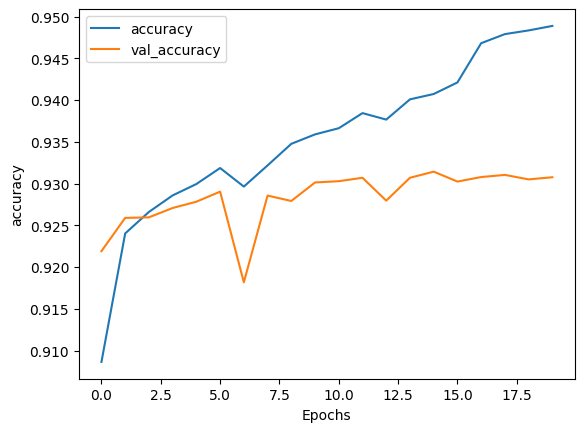

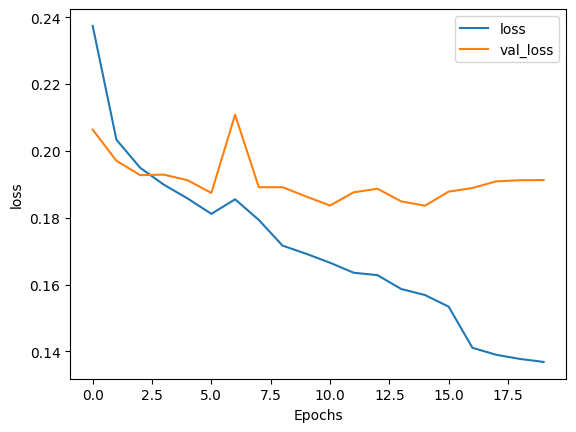

ValueError: A total of 1 objects could not be loaded. Example error message for object <LSTMCell name=lstm_cell, built=True>:

Layer 'lstm_cell' expected 3 variables, but received 0 variables during loading. Expected: ['kernel', 'recurrent_kernel', 'bias']

List of objects that could not be loaded:
[<LSTMCell name=lstm_cell, built=True>]

In [9]:
# -*- coding: utf-8 -*-
"""Modelling Deep Learning Part 2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SIZJ-eTr2zjD7fBo6XdgkWhK-rqKRlFl

# Library
"""

!pip install pandas

!pip install matplotlib

!pip install scikit-learn

# Library to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Library tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Surpress warning
import warnings
warnings.filterwarnings("ignore")

# Library sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# pickle
import pickle

"""# Dataset"""

# Read dataset
data = pd.read_csv('/kaggle/input/suicide-ideation-clean/clean_text.csv')
data.head()

"""# Encoding"""

X = data['clean_text'].astype(str)
y = data['class']

# encode class values as integers
# Define label encoder
encoder = LabelEncoder()
# fit and transform
encoded_y = encoder.fit_transform(y)

"""# Test Train Split"""

# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X,encoded_y, test_size=.2, random_state=42)

"""# Data Preprocessing"""

vocab_size = 1000
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(y_train)
testing_labels = np.array(y_test)

"""# List Resource"""

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

"""# Bidirectional LSTM 1 Layer"""

embedding_dim = 16
# Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(max_length,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="/kaggle/working/Bidirectional-LSTM-1-Layers.keras", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

# Define the number of epochs
num_epochs = 50

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), callbacks=callbacks, batch_size=128)

# Evaluate the model
results_base = model.evaluate(testing_padded, testing_labels)

# print results
print(f'Test results - Loss: {results_base[0]} - Accuracy: {100*results_base[1]}%')

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

"""# Testing Model"""

# Load all model
BiLSTM1L_Model = tf.keras.models.load_model('/kaggle/working/Bidirectional-LSTM-1-Layers.keras')

"""## Testing BiLSTM 1 Layers"""

# Define the tweet
twt = ['I will kill myself']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Predict the sentiment
prediction = BiLSTM1L_Model.predict(twt)

# Print the prediction
if(np.argmax(prediction) == 0):
    print("Potential Suicide Post")
elif (np.argmax(prediction) == 1):
    print("Non Suicide Post")

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Predictions
pred_probs = model.predict(testing_padded)
pred_labels = np.round(pred_probs).astype(int).flatten()  # Convert probabilities to binary predictions

# True labels
true_labels = testing_labels

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Recall
recall = recall_score(true_labels, pred_labels, average='binary')
print("Recall: {:.2f}".format(recall))

# Precision
precision = precision_score(true_labels, pred_labels, average='binary')
print("Precision: {:.2f}".format(precision))

# F1-score
f1 = f1_score(true_labels, pred_labels, average='binary')
print("F1-score: {:.2f}".format(f1))

1451/1451 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step
Confusion Matrix:
 [[21737  1550]
 [ 1633 21495]]
Accuracy: 93.14%
Recall: 0.93
Precision: 0.93
F1-score: 0.93
